<img src="https://www.smarthint.co/wp-content/uploads/2019/03/futuro-do-ecommerce.jpg" width="80%"  height="90%" align="right" hspace="4%" vspace="1%"/>

Nowaday, E-Commerce is really popular with everyone. Especially in the Covid-19 periods. My mission is to find some insights that can improve the sales situation of corporate. 

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

E-Commerce dataset can help me approach with kind of new major like that.... In this session, we forcus on analyzing with RFM method 

In the layout of this notebook, we analyze step by step as:

***1. DATA PREPARE***

***2. DATA CLEANING***

***3. DATA EXPLORATION***

**4. CONCLUSION**

**5. DATA PRE PROCESSING**

**6. BUILDING MODEL**


**DATA PREPARE**

In [ ]:
# Import some necessary module:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
# Import datetime module
import datetime as dt
# Import visualize module
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as pe
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
!pip install squarify
import squarify

In [ ]:
# Import csv 
df = pd.read_csv("E-Commerce.csv",encoding="unicode_escape")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 8:26,3.39,17850.0,United Kingdom


This dataset which I get from Kaggle, it's shows a sale situation of an e-commerce firm in the UK. 
In this dataset, we have eight features:
- InvoiceNo:
- StockCode:
- Description:
- Quantity:
- InvoiceDate:
- UnitPrice:
- CustomerID:
- Country:

**CLEANING DATA**

In [ ]:
# Shape of Dataset
print(df.shape)

(541909, 8)


The dataset has 541909 rows and 8 columns

**1. Data Formating**

In [ ]:
# Show some short info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**2. Handling missing values**

In [ ]:
# Check missing values
missing_data = df.isnull().sum().to_frame()
# Caculate a percent missing values
missing_percent = df.isnull().sum() / df.shape[0] *100
missing_percent

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

- Description have 0.26% null values => We don't need to drop but we must to explain how Description is missing
- Customer ID has a 24.9% null value => Very large amount of NaN can be affected by the EDA results. We can drop rows that include the Customer ID missing data

In [ ]:
df.dropna(axis=0,subset= ["CustomerID"],inplace =True)

**3. Checking duplicated values**

In [ ]:
# Check duplicates values in StockCode
df["StockCode"].duplicated().value_counts().to_frame()

,StockCode
True,403145
False,3684


We can imagine that one customer buy some products which written on invoice => May be duplicated StockCode is normal

**4. Handling Special Symbols**

We can see some content of Description that is wrong or missing => It's no meaning

In [ ]:
df = df.drop(df[df["Description"].copy().str.len() < 10].index) # Drop some columns have len < 10 symbols
df = df.dropna() # Drop NaN value
df["Description"] = df["Description"].str.lower() #Change to lower

In [ ]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12/01/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/01/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/01/2010 8:26,3.39,17850.0,United Kingdom


**EXPLORATION** **DATA**

**1. InvoiceNo**

How many different invoices numbers that we have ?

In [ ]:
invoice_number = df["InvoiceNo"].nunique() # Distinct count number of invoices
print("Total Different Invoice Numbers Are " + str(invoice_number))

Total Different Invoice Numbers Are 21809


In the dataset description, a canceled transactions have an InvoiceNo starts with a "C". Now we explain about canceled invoices 

In [ ]:
canceled_df = df.loc[df["InvoiceNo"].str[0] == "C"] # Create a canceled_ df with all canceled transactions
print("Number of all canceled invoices are: " + str(canceled_df["InvoiceNo"].nunique())) 
percent_canceled = canceled_df["InvoiceNo"].nunique() / invoice_number *100 # Caculate percent number of canceled invoices
print("% Canceled invoices is: " + str(round(percent_canceled,3)) +"%")

Number of all canceled invoices are: 3399
% Canceled invoices is: 15.585%


15.6% of all invoices are canceled and 84.4% number of invoices normally transact. We can explore cancaled_df to find why are some invoices canceled

Exploring some canceled transactions

In [ ]:
canceled_df.describe()

,Quantity,UnitPrice,CustomerID
count,8552.000000,8552.000000,8552.000000
mean,-31.512278,5.359326,14994.821094
std,1193.909030,27.709666,1703.430830
min,-80995.000000,0.030000,12346.000000
25%,-6.000000,1.450000,13534.000000
50%,-2.000000,2.550000,14901.500000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,1100.440000,18282.000000


All canceled transactions have all negative quantity and have a large range of outliers, positive prices. => Maybe this is a failure in the system which cause the transactions must be canceled

Don't have much informations to explain this case. That why we need to drop some canceled invoices to avoid affecting to model

In [ ]:
df = df.loc[df["InvoiceNo"].str[0] != "C"] # Drop canceled invoices

**2. Description**

How much number of unique descriptions that we have

In [ ]:
df["Description"].nunique()

3871

Top 10 descriptions are most common

Text(0.5, 1.0, 'Top 10 Most Common Descriptions')

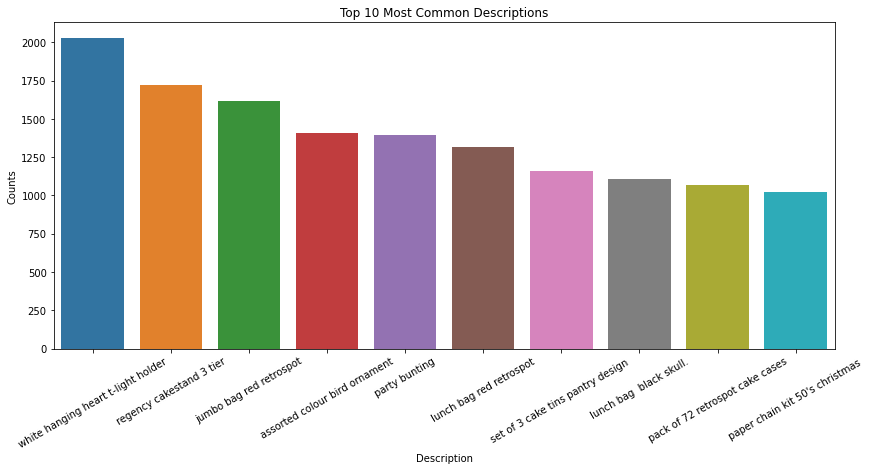

In [ ]:
count_description = df["Description"].value_counts().sort_values(ascending=False).iloc[:10] # Top 10 most descriptions
# Visualize
plt.figure(figsize =(14,6))
sns.barplot(count_description.index, count_description.values)
plt.ylabel("Counts")
plt.xlabel("Description")
plt.xticks(rotation =30) 
plt.title("Top 10 Most Common Descriptions")

We can see almost product that the company supply to the market is decorative items

The most common products are **White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, Assort Colour Bird Omament, Party Bunting (The decorating party items)** and  ***Jumbo Bag Red Retrospot, Lunch Bag Red Retrospot, Lunch Bag Black Skull,..(The equip for lunch serve at the office)*** 

=> This is a company that provides main products for decorate purpose and household items

What is a most popular keywords ?

Text(0.5, 1.0, 'Top 10 Popular Keywords')

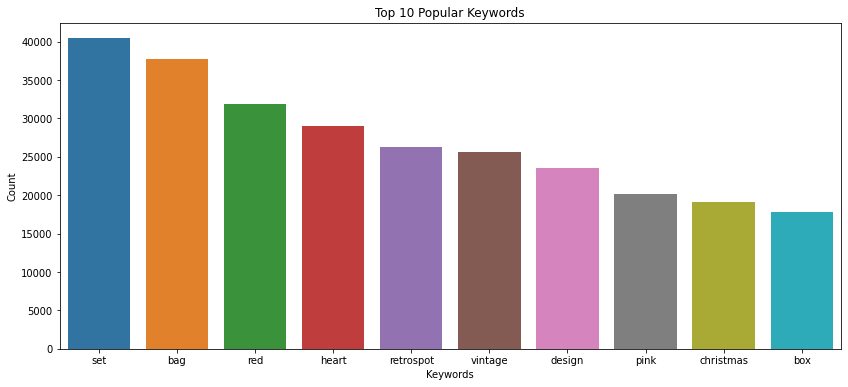

In [ ]:
# Split each word into list
lists = []
keywords = []
for i in df["Description"]:
  i = str(i)
  words = i.split(" ")
  lists.append(words)
  for j in range(len(words)):
    keywords.append(words[j])

# Drop some keywords that have less than 2 characters (It's not meaningful)
keywords = pd.DataFrame(keywords,columns=["Keyword"])
keywords = keywords.drop(keywords[keywords["Keyword"].str.len() <= 2 ].index)

keywords = keywords["Keyword"].value_counts().sort_values(ascending = False).iloc[:10]

# Visualize
plt.figure(figsize=(14,6))
sns.barplot(keywords.index,keywords.values)
plt.ylabel("Count")
plt.xlabel("Keywords")
plt.title("Top 10 Popular Keywords")

If we remove some keywords that have characters are lower than 3, we have a result that **SET** is the most common keyword. Next, **BAG, RED, HEART, VINTAGE, DESIGN**,... is a common keyword relating to decorative activities

=> I guess that this company specialized operate in wholesalers and the customers always purchase set of products in one invoice 

**3. Quantity**

Which is the product have the most sold quantities

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

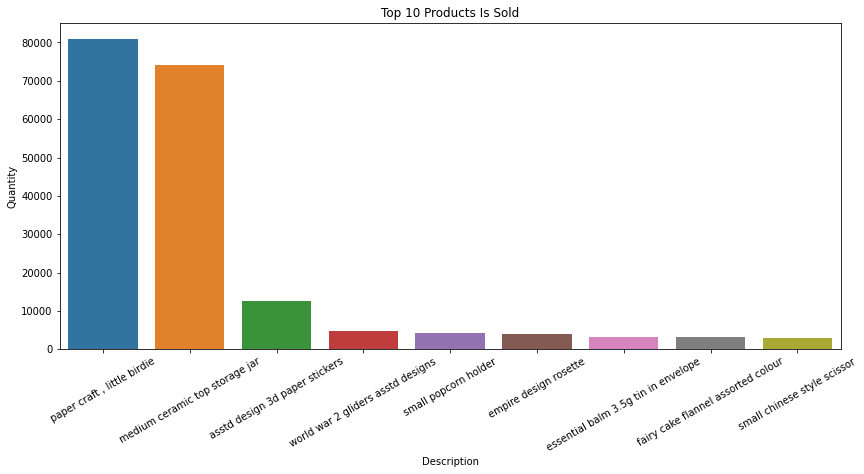

In [ ]:
top10_quantity = df.sort_values(by = "Quantity", ascending = False).iloc[:10]

plt.figure(figsize=(14,6))
sns.barplot(top10_quantity["Description"],top10_quantity["Quantity"])
plt.ylabel("Quantity")
plt.xlabel("Description")
plt.title("Top 10 Products Is Sold")
plt.xticks(rotation =30) 

Paper craft, medium ceramic top storage jar and assorted design 3D paper stickers is the best product. But it's quite far from other products and it's not in the top 10 most common description => May be this is outlier and we need to check the frequency of some product

In [ ]:
check = df.loc[df["Description"] == "paper craft , little birdie"]
print("The frequency of appearance: " + str(len(check)))

The frequency of appearance: 1


In [ ]:
check = df.loc[df["Description"] == "medium ceramic top storage jar"]
print("The frequency of appearance: " + str(len(check)))

The frequency of appearance: 198


In [ ]:
check = df.loc[df["Description"] == "asstd design 3d paper stickers"]
print("The frequency of appearance: " + str(len(check)))

The frequency of appearance: 36


We can see Paper craft, little birdie have a highest sold number, but it just sell one time with a large quantity => It is not long lasting product and I think that it have a wrong in data entry

**4. Revenue**

Check unit price < 0 ?

In [ ]:
# Check a Unit Price  0 ?
df = df.loc[df["UnitPrice"] > 0] # Remove unit price < 0 

In [ ]:
# Create revenue column
df["Revenue"] = df["UnitPrice"]*df["Quantity"]
df = df.loc[df["Revenue"] > 0] # Split two part: One free and one makes revenue

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

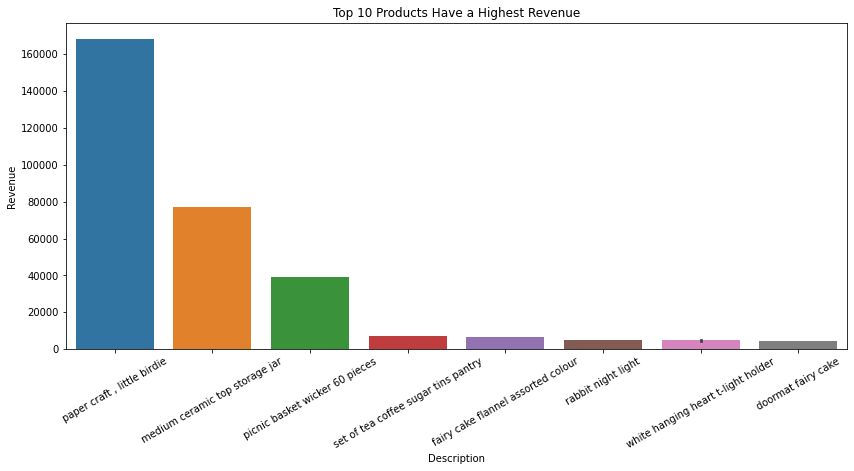

In [ ]:
top10_revenue = df.sort_values(by = "Revenue",ascending = False).iloc[:10]

plt.figure(figsize=(14,6))
sns.barplot(top10_revenue["Description"],top10_revenue["Revenue"])
plt.ylabel("Revenue")
plt.xlabel("Description")
plt.title("Top 10 Products Have a Highest Revenue")
plt.xticks(rotation =30) 

Except Paper Craft - Little Birdie, Medium Ceramic Top Storage Jar and Picnic Basket Wicker 60 Pieces are the key products that bring the most sale for company

**5. Country**

In dataset, because of UK firm. So we need split 2 parts: UK and others

**How much revenues can this firm earn in UK ?**

In [ ]:
revenues = df.loc[df["Country"] == "United Kingdom"]["Revenue"].sum() # Total revenues that this firm can earn in UK
percent_revenues = revenues/df["Revenue"].sum() *100
print(" Total Revenues that this firm earn in UK are " + str(revenues))
print(" Percent revenues that this firm earn in UK are " + str(round(percent_revenues,3)) + "%")
print(" Percent revenues that this firm earn in the orthers are " + str(round(100 - percent_revenues,3)) + "%")

 Total Revenues that this firm earn in UK are 7268314.644
 Percent revenues that this firm earn in UK are 82.957%
 Percent revenues that this firm earn in the orthers are 17.043%


And the orthers

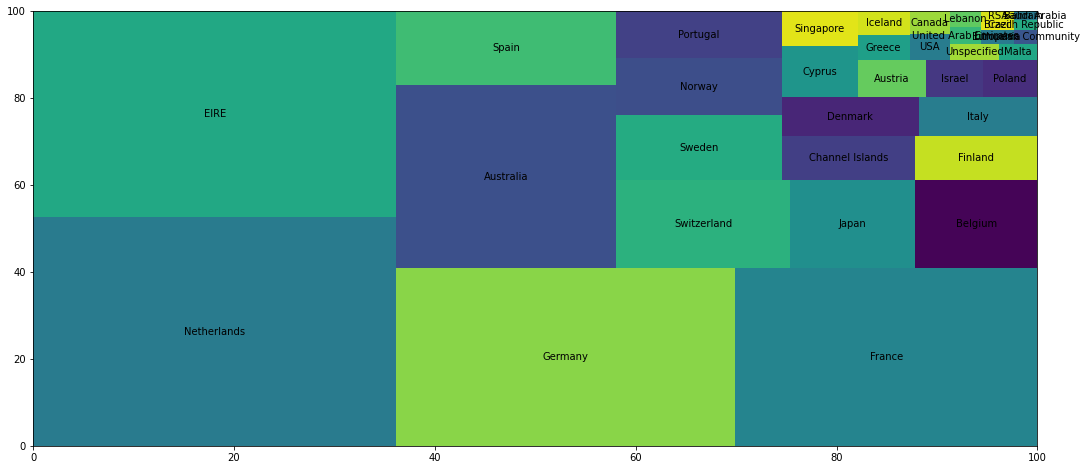

In [ ]:
country_revenue = df.groupby(["Country"]).sum()["Revenue"].sort_values(ascending = False)[1:]

#fig = pe.pie(names=country_revenue.index,values=country_revenue.values,width=850,height=600,)
#fig.show()
plt.figure(figsize=(15,8))
fig = squarify.plot(sizes= country_revenue.values, label = country_revenue.index )
plt.show()

The company revenue is from 83% domestic area (UK) and 17% in other countries

Except UK, company sell for Netherlands, Republic of Ireland (EIRE), Germany, France and little bit for the orthers

**6. Custumer ID**

Text(0.5, 1.0, 'Top 10 Customers')

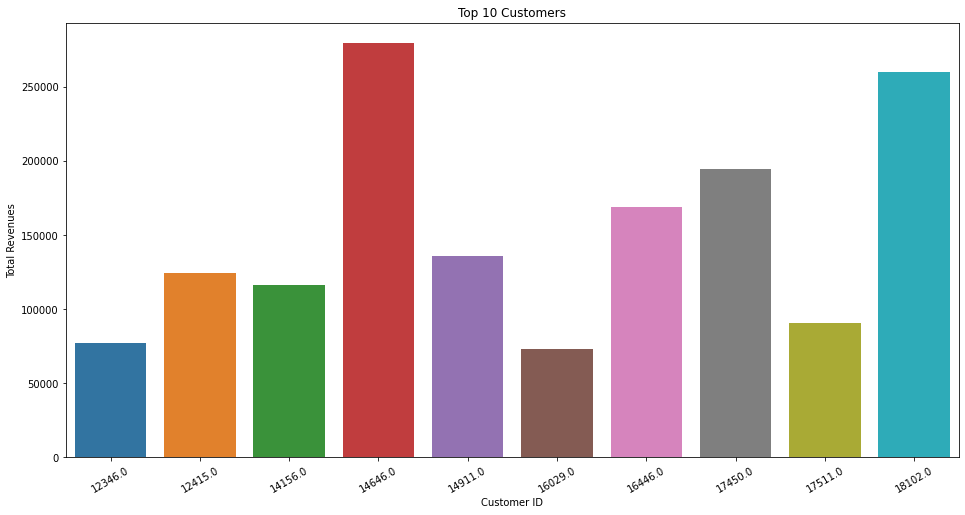

In [ ]:
top_customer = df.groupby(by="CustomerID")["Revenue"].sum().sort_values(ascending = False).iloc[:10]

plt.figure(figsize=(16,8))
sns.barplot(x=top_customer.index,y=top_customer.values)
plt.xticks(rotation =30)
plt.xlabel("Customer ID")
plt.ylabel("Total Revenues")
plt.title("Top 10 Customers")

Customer have a ID that is 14646 and 14911 buy highest amount of items and bring a large revenue for company => Keep taking care of 2 this custumers

**7. Invoice Date**

In [ ]:
# Convert InvoiceDate
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
# Transfer invoicedate to datetime dtype and split date and time  
df["InvoiceHour"] = df["InvoiceDate"].dt.strftime("%H") # Get hour from datetime
df["Month"] = df["InvoiceDate"].dt.strftime("%m") # Get hour from datetime
df["Year"] = df["InvoiceDate"].dt.strftime("%Y") # Get year from datetime
df["Weekday"] = df["InvoiceDate"].dt.strftime("%A") # Get weekday from datetime
df["InvoiceHour"] = df["InvoiceHour"].astype(int) # Tranfer object type to int type
df["InvoiceDate"] = df["InvoiceDate"].dt.strftime("%Y-%m-%d") # Just keep year - month - day aand remove time

**Heatmap to show revenue in month, year at UK**

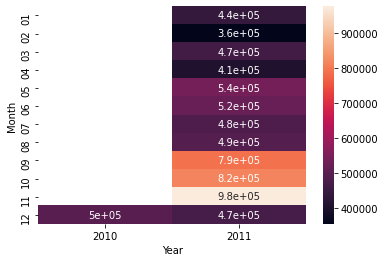

In [ ]:
# Heatmap to show a sum of sold items and sold value in UK
df = df.set_index("InvoiceDate")
df = df.loc[df["Country"] == "United Kingdom"]

heatmap = pd.pivot_table(df,values="Revenue",aggfunc="sum",index=["Month"],columns="Year") # Create a pivot table with month index and year column, sum of Quantity
sns.heatmap(heatmap,annot = True)

Line chart to show seasonality analysis

Text(0.5, 1.0, 'Revenue with Month')

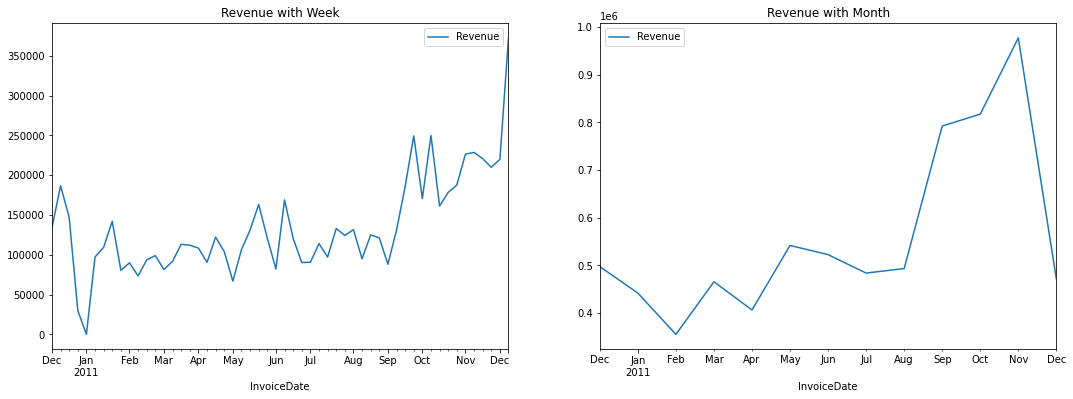

In [ ]:
# Line bar of revenue
fig, ax = plt.subplots(1,2,figsize=(18,6))

df.index = pd.to_datetime(df.index) # Trasfer index to datetime type
revenue_week = df[["Revenue"]].resample('W').sum()
revenue_week.plot(ax=ax[0])
ax[0].set_title("Revenue with Week")

#revenue_month = df1[["Revenue"]]
revenue_month = df[["Revenue"]].resample('M').sum()
revenue_month.plot(ax=ax[1])
ax[1].set_title("Revenue with Month")

If excluding the incomplete data for December in 2011, we can see the uptrend revenue by month. The low season is from January to Febuary, the peak season is from August to November, maybe to December but we missing data in December

Maybe the end of the year, include many special occasions like Christmas,... And that bring for company the large revenue.

Text(0.5, 1.0, 'Accumulated Revenue By Month')

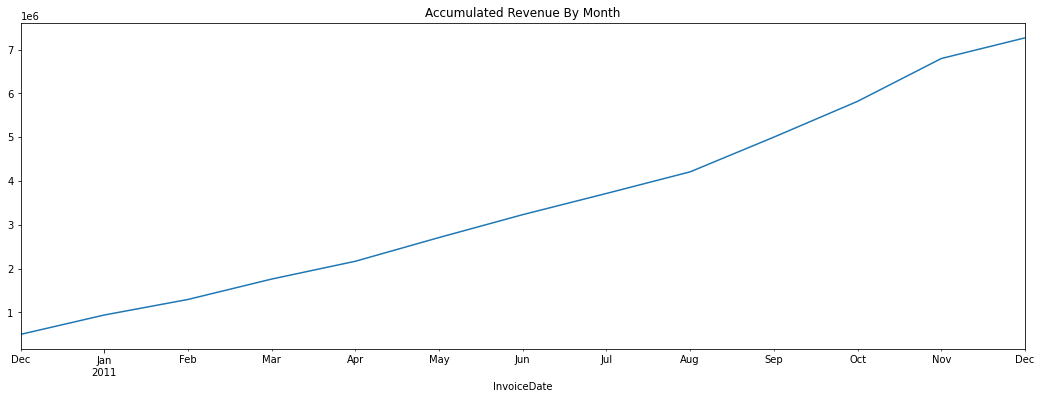

In [ ]:
plt.figure(figsize=(18,6))
cum_revenue_month = df[["Revenue"]].resample('M').sum()
cum_revenue_month["cum"] = cum_revenue_month.cumsum()
fig = cum_revenue_month["cum"].plot()
fig.set_title("Accumulated Revenue By Month")

From January to the end of July, the trend of accumulated revenue look like a straight line, but the slope gradually increases from August 

**When is the time with the most transactions?**

Text(0.5, 1.0, 'Number Of Invoices In Hour')

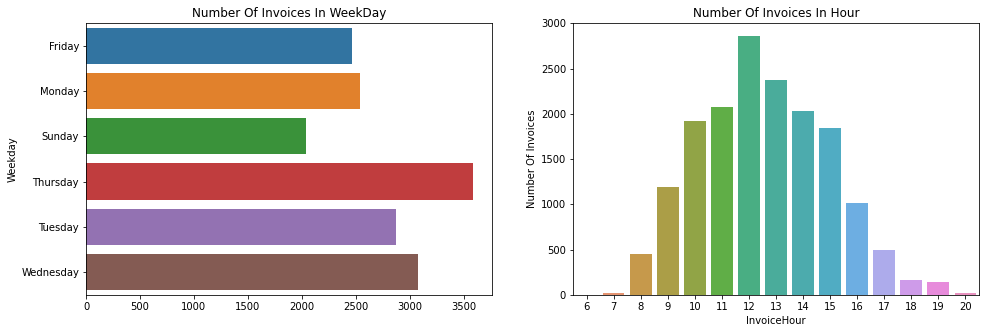

In [ ]:
groupby_weekday = df.groupby(by="Weekday")["InvoiceNo"].nunique()

fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.barplot(y=groupby_weekday.index,x=groupby_weekday.values, ax=ax[0])
plt.xlabel("Number Of Invoices")
plt.ylabel("Weekday")
ax[0].set_title("Number Of Invoices In WeekDay")

groupby_hour = df.groupby(by="InvoiceHour")["InvoiceNo"].nunique()

sns.barplot(x=groupby_hour.index,y=groupby_hour.values,ax=ax[1])
plt.xlabel("InvoiceHour")
plt.ylabel("Number Of Invoices")
ax[1].set_title("Number Of Invoices In Hour")

No transaction is on Saturday, and Sunday is the day to sell the fewest bills. Midweek days are the days that sell the most 

At the same, 12h is a peaktime that is the best selling time.

Text(0.5, 1.0, 'Sum Of Revenue In Hour')

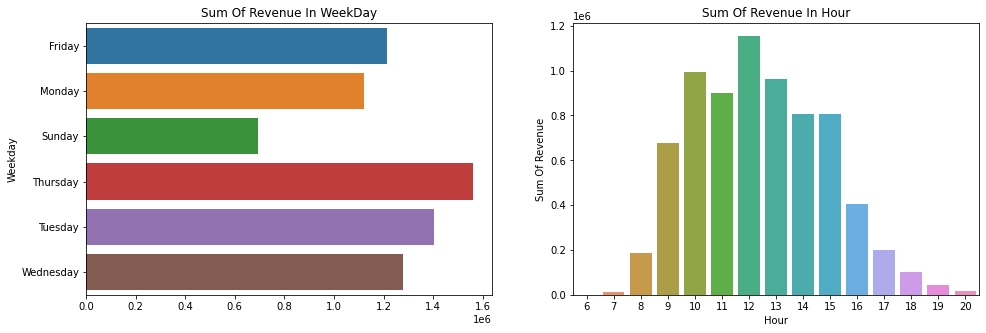

In [ ]:
revenue_weekday = df.groupby(by="Weekday")["Revenue"].sum()

fig, ax = plt.subplots(1,2,figsize=(16,5))
sns.barplot(y=revenue_weekday.index,x=revenue_weekday.values, ax=ax[0])
plt.xlabel("Sum of Revenue")
plt.ylabel("Weekday")
ax[0].set_title("Sum Of Revenue In WeekDay")

revenue_hour = df.groupby(by="InvoiceHour")["Revenue"].sum()

sns.barplot(x=revenue_hour.index,y=revenue_hour.values,ax=ax[1])
plt.xlabel("Hour")
plt.ylabel("Sum Of Revenue")
ax[1].set_title("Sum Of Revenue In Hour")

Similar to InvoiceNo, the peak time bring revenue for company that is Midweeks ( Thursday, Tuesday, Wednesday) and noon time ( 10h - 15h ) 

Opposed to almost company, the peak season of this company is in from September to November and low season is from January to February. Because this dataset just have value of revenue to 09.12.2011 (3 weeks missing) => It is't accurately expressed the revenue of December in 2011

**CONCLUSION**

1. During periods from December 2010 to December 2011, company have 15.6% canceled transaction and 84.4% successful transaction. The main reason that incorrect informations on invoices and company must cancel to revise

2. The main kind of product that company supply for market is decorative and household items => And also it brings a great profit to the commpany

3. This company specialized to operate in wholesalers and customer potential demand are about decorative keywords 

4. The company primarily sell to the domstic market (82%) and the rest for foreign market (18%)

5. The company focus on taking care of a small portion of customers 

6. Low season is from January to Febuary, the peak season is from August to November

7. The peak time bring revenue for company that is Midweeks ( Thursday, Tuesday, Wednesday) and noon time ( 10h - 15h )

**DATA PRE PROCESSING**

**1. Quantity**

Overall describe in Quantity

In [ ]:
df1 = df.copy() # d1 is df to use for making model
df["Quantity"].describe()

count    353687.000000
mean         11.999330
std         189.379544
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

The range of outlier so far => We need to remove outliers to avoid affecting the model

**Checking Outliers**
Usually, we have 3 ways to find outliers:
- Log
- Z score
- Box plot

STD có thể sử dụng để xác định outliers trong dữ liệu có dạng/gần như dạng phân phối chuẩn (hay còn gọi là phân phối Gauss)
IQR có thể sử dụng để xác định và loại bỏ outliers không phụ thuộc vào dạng phân phối của dữ liệu

In [ ]:
# Create a def to remove outliers with boxplot
def factor(x):

  min = df1[x].min()
  max = df1[x].max()
  Q1 = np.quantile(df1[x], 0.25)
  Q3 = np.quantile(df1[x], 0.75)
  IQR = Q3 - Q1
  upper = 1.5*IQR + Q3
  lower = Q1 - 1.5*IQR
  # We limit the range of upper and lower (upper <= max and lower >= min)
  if upper > max:
    upper = max
  else:
    upper = upper
  if lower < min:
    lower = min
  else:
    lower = lower
  # Remove outliers
  return df1.loc[(df1[x] <= upper) & (df1[x] >= lower)]


In [ ]:
factor("Quantity")["Quantity"].describe()

count    333483.000000
mean          6.707562
std           6.565343
min           1.000000
25%           2.000000
50%           4.000000
75%          12.000000
max          27.000000
Name: Quantity, dtype: float64

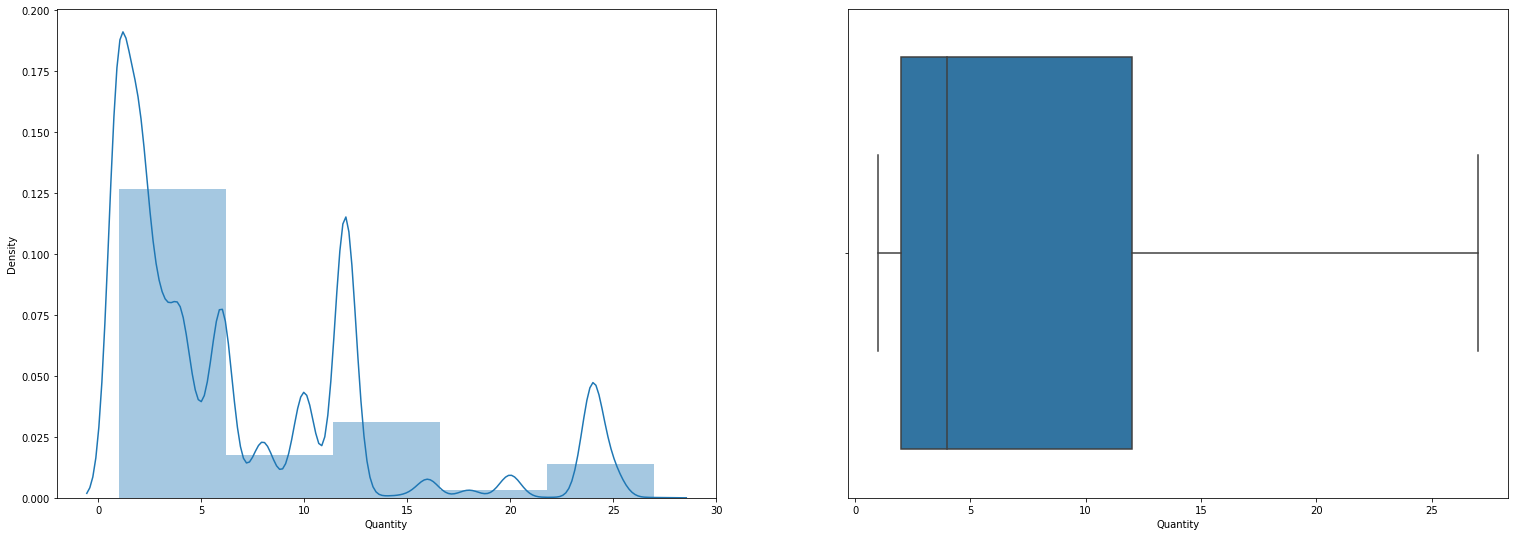

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(26,9))
sns.distplot(factor("Quantity")["Quantity"],bins=5,ax=ax[0])
sns.boxplot(x=factor("Quantity")["Quantity"],ax=ax[1])

**2. Revenue**

In [ ]:
factor("Revenue")["Revenue"].describe()

count    325050.000000
mean         10.999215
std           8.349265
min           0.001000
25%           3.750000
50%           9.900000
75%          16.500000
max          38.000000
Name: Revenue, dtype: float64

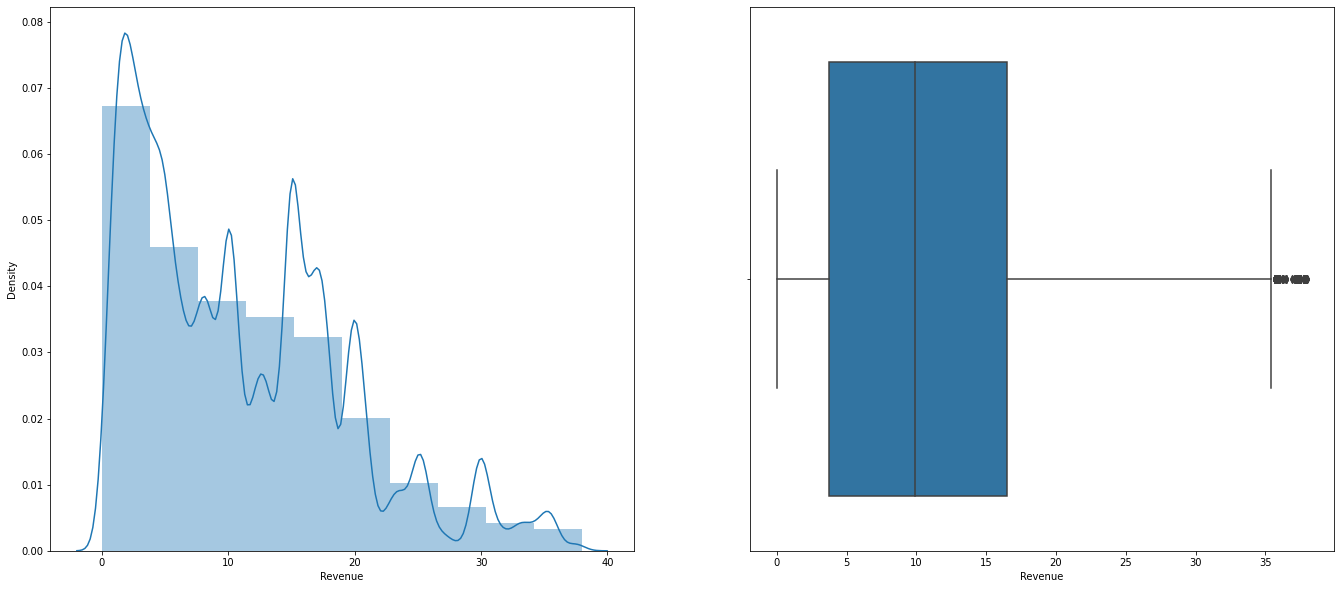

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(23,10))
sns.distplot(factor("Revenue")["Revenue"], bins = 10, ax=ax[0])
sns.boxplot(x=factor("Revenue")["Revenue"],ax=ax[1])

Maybe outliers are appeared and we need to remove

**The scatterplot of Revenue**

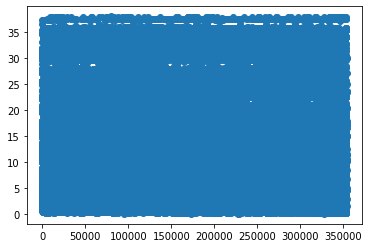

In [ ]:
df1.reset_index(inplace = True)
plt.scatter(x=factor("Revenue").index,y=factor("Revenue")["Revenue"])

In [ ]:
# merge data
df_test = pd.merge(factor("Quantity"),factor("Revenue"))

**BUILDING A RFM MODELING**

In [ ]:
# Building a RFM with R,F,M factors

# R - Recency 
current_date = max(df_test["InvoiceDate"]) + dt.timedelta(days = 1)

# M - Moneytary Value
df_test["Revenue"]

# Groupby Customer ID to caculate RFM
df_customer = df_test.groupby(["CustomerID"]).agg(
    {"InvoiceDate" : lambda x: (current_date - x.max()).days,
     "InvoiceNo" : "count",
     "Revenue" : "sum"})

In [ ]:
df_customer = df_customer.rename(columns= {"InvoiceDate" : "R", "InvoiceNo" : "F", "Revenue":"M"})

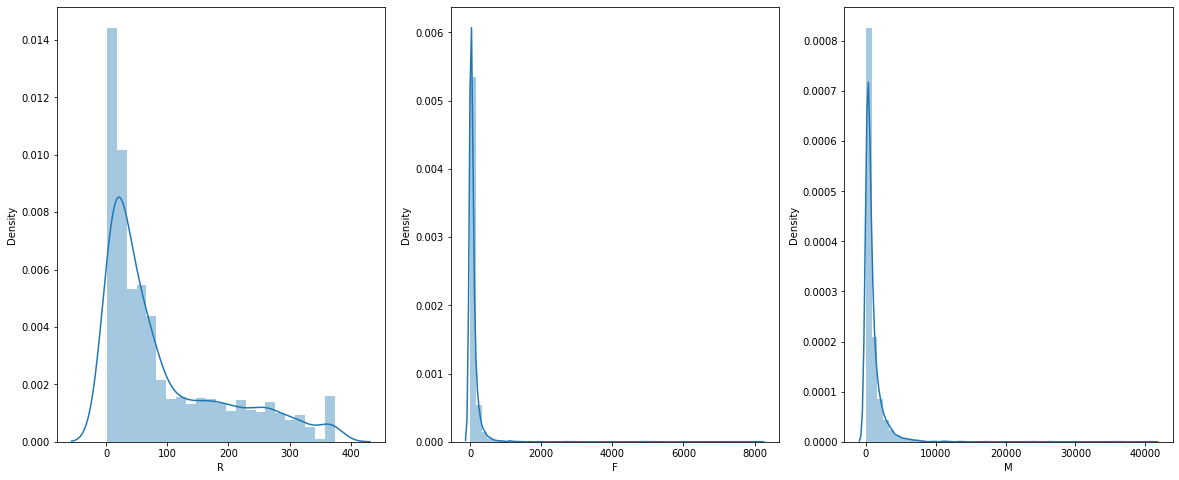

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(df_customer["R"], ax=ax[0])
sns.distplot(df_customer["F"], ax=ax[1])
sns.distplot(df_customer["M"], ax=ax[2])

We check a skew of each factors in modeling

In [ ]:
print(np.log(df_customer["R"]).skew()) # In case we use log method to transformat to standard distribution
print(np.log(df_customer["F"]).skew())
print(np.log(df_customer["M"]).skew()) # It nearly 0 => Maybe nearly stardard distribution

-0.4633479102643761
-0.1933960998581938
-0.2543530544214494


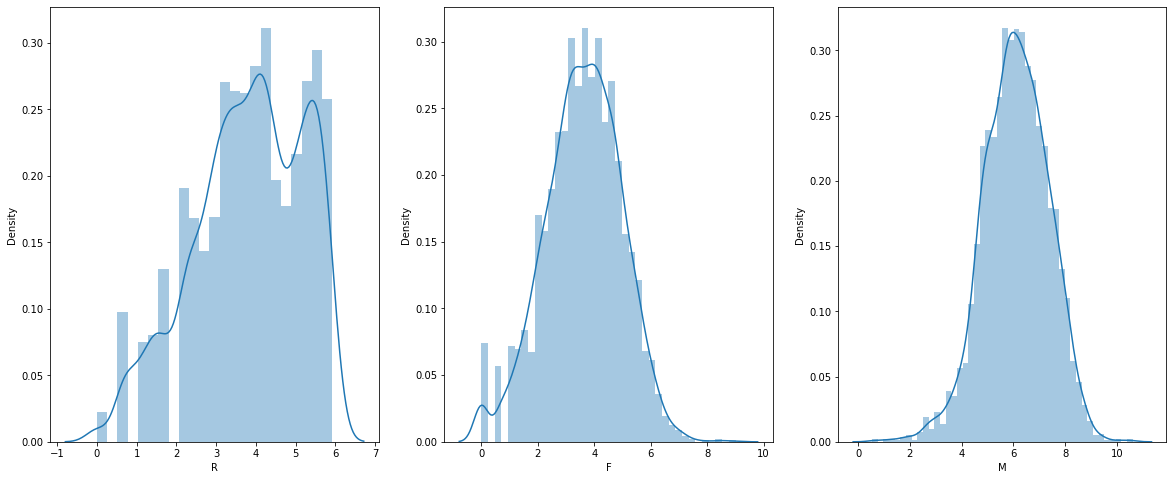

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(np.log(df_customer["R"]), ax=ax[0])
sns.distplot(np.log(df_customer["F"]), ax=ax[1])
sns.distplot(np.log(df_customer["M"]), ax=ax[2])

Transformation

In [ ]:
df_T = pd.DataFrame()
df_T["R"] = pd.Series(np.log(df_customer["R"])).values
df_T["F"] = pd.Series(np.log(df_customer["F"])).values
df_T["M"] = pd.Series(np.log(df_customer["M"])).values
df_T.head(5)

,R,F,M
0,1.098612,4.330733,7.403603
1,0.000000,8.475538,10.074213
2,1.386294,5.231109,8.153338
3,1.386294,4.060443,6.828301
4,5.370638,1.791759,4.529584


In [ ]:
#Begining scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_T)

df_T = scaler.transform(df_T)

In [ ]:
pd.DataFrame(df_T).head()

,0,1,2
0,-1.980575,0.536120,1.036596
1,-2.782098,3.597132,3.164895
2,-1.770689,1.201063,1.634085
3,-1.770689,0.336506,0.578117
4,1.136198,-1.338958,-1.253808


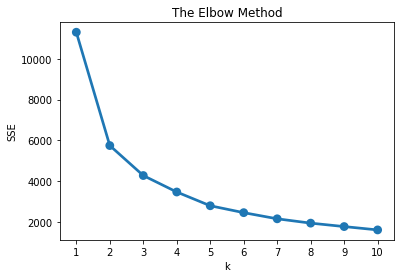

In [ ]:
# Use KNN
from sklearn.cluster import KMeans

sse = {}
for k in range (1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_T)
    sse[k] = kmeans.inertia_

plt.title("The Elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))

In [ ]:
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(df_T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
df_customer["Cluster"] = model.labels_
df_customer.head(5)

,R,F,M,Cluster
CustomerID,,,,
12747.0,3,76,1641.89,0
12748.0,1,4796,23723.29,0
12749.0,4,187,3474.96,0
12820.0,4,58,923.62,0
12821.0,215,6,92.72,2


In [ ]:
df_customer.groupby("Cluster").mean()

,R,F,M
Cluster,,,
0,17.565455,216.690000,2206.762391
1,100.930147,50.140931,574.122643
2,161.385286,9.390126,125.879574
